In [4]:
word_number = 100000

In [5]:
# filter raw text to contain only valid words
with open('../input.txt', 'r', encoding='utf-8') as f_in:
    with open('input.txt', 'w', encoding='utf-8') as f_out:
        for line in f_in:
            words = [transformed for w in line.replace('();,.\'"', ' ').split() if (transformed := w.lower().strip()).isalpha()]
            f_out.write(" ".join(words) + "\n")

In [6]:
import pandas as pd
from collections import Counter

In [8]:
word_count = Counter()
head = ""
last_word = ""
with open('input.txt', 'r', encoding="utf-8") as f:
    for sentence in f:
        words = sentence.split()
        word_count.update(words)
        print(len(word_count))
        if len(word_count) > word_number:
            break

20
32
41
50
50
63
72
79
82
93
104
108
119
131
134
140
143
160
167
171
171
174
176
181
185
190
194
204
211
211
216
229
232
242
247
261
268
276
283
288
292
304
313
319
331
338
349
359
366
372
378
388
388
390
396
399
404
413
420
423
431
431
435
437
440
445
449
455
455
461
468
474
483
487
494
506
508
514
524
534
538
545
557
563
569
577
586
588
595
600
602
606
612
625
627
635
643
651
660
666
677
683
691
694
694
700
703
705
707
715
716
723
727
728
735
740
753
754
763
766
766
768
768
768
768
769
769
777
780
783
793
803
803
803
815
819
825
829
839
846
853
858
859
864
879
880
896
901
911
915
926
936
942
950
956
961
964
972
982
987
998
999
1009
1022
1025
1031
1048
1053
1054
1056
1061
1072
1074
1084
1092
1092
1095
1099
1102
1107
1117
1120
1129
1134
1144
1145
1146
1147
1152
1156
1162
1169
1172
1176
1178
1180
1185
1187
1191
1194
1197
1199
1208
1209
1212
1214
1218
1226
1226
1228
1235
1236
1238
1238
1243
1248
1249
1252
1257
1261
1264
1270
1278
1283
1289
1291
1293
1298
1298
1304
1305
1311
1316
1324
13

In [4]:
# zrozumienie 90% tekstu, odcięcie ile wyrazów trzeba znać
# graf z krawędziami, 50, sąsiadów
# plik pdf, kody źródłowe
# filter words
# TODO add word stampling to reduce effects of conjugations

In [9]:
word_count.most_common(20)

[('der', 53499),
 ('die', 48035),
 ('und', 37950),
 ('in', 27220),
 ('von', 17975),
 ('den', 15733),
 ('das', 13598),
 ('im', 13580),
 ('des', 13443),
 ('mit', 12053),
 ('als', 10643),
 ('zu', 10460),
 ('dem', 9387),
 ('eine', 9236),
 ('sich', 8647),
 ('für', 8330),
 ('auf', 8321),
 ('ist', 8022),
 ('auch', 7271),
 ('ein', 7053)]

In [10]:
# create dataframe
df = pd.DataFrame(columns=['rank', 'word', 'count', 'zipf'])

for i, (word, count) in enumerate(word_count.most_common(), start=1):
    zipf = count * i
    df.loc[len(df)] = [i, word, count, zipf]

df = df.set_index('rank')
df.to_csv('data.csv', encoding='utf-8')
print(df)

                             word  count    zipf
rank                                            
1                             der  53499   53499
2                             die  48035   96070
3                             und  37950  113850
4                              in  27220  108880
5                             von  17975   89875
...                           ...    ...     ...
99997          informationsgehalt      1   99997
99998                     zufalls      1   99998
99999   informationstheoretischen      1   99999
100000                 unverletzt      1  100000
100001                schrödinger      1  100001

[100001 rows x 3 columns]


In [3]:
import pandas as pd
# read in dataframe
df = pd.read_csv('data.csv', encoding='utf-8', index_col='rank')
print(df)

                    word  count    zipf
rank                                   
1                    der  23159   23159
2                    die  18293   36586
3                    und  17600   52800
4                     in  11657   46628
5                    von   8333   41665
...                  ...    ...     ...
100022  kaufmannsfamilie      1  100022
100023               ter      1  100023
100024            beurze      1  100024
100025            buerze      1  100025
100026            buerse      1  100026

[100026 rows x 3 columns]


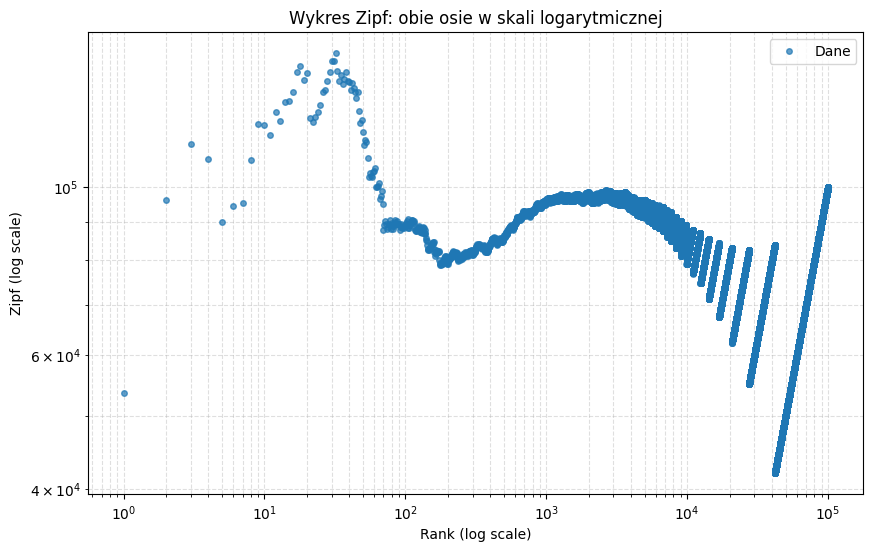

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# TODO understand 90% cut off to 90% of words

# Przygotuj dane
ranks_arr = np.array(df.index)
zipf_arr = np.array(df.zipf)

plt.figure(figsize=(10, 6))
plt.loglog(ranks_arr, zipf_arr, marker='o', linestyle='none', markersize=4, alpha=0.7, label='Dane')

plt.xlabel('Rank (log scale)')
plt.ylabel('Zipf (log scale)')
plt.title('Wykres Zipf: obie osie w skali logarytmicznej')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.show()

[10.90238371  8.10163273]


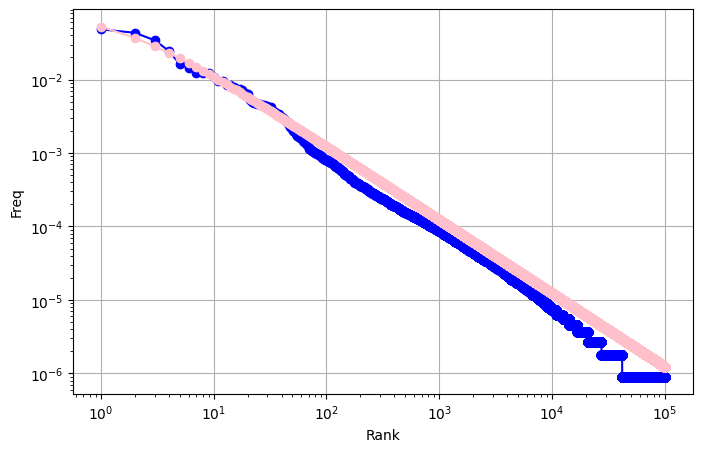

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ranks_arr = df.index.to_numpy()
freq_arr = df['count'].to_numpy() / np.sum(df['count'])

def model(x, a, b):
    return 1 / (x * b + a)

params, covariance = curve_fit(model, ranks_arr, freq_arr)
a_fit, b_fit = params
print(params)
ideal = 1 / (ranks_arr * b_fit + a_fit)  # 1 / rank shifted down and skewed according to wikipedia



# Plot
plt.figure(figsize=(8, 5))
plt.loglog(ranks_arr, freq_arr, marker='o', linestyle='-', color='blue')
plt.loglog(ranks_arr, ideal, marker='o', linestyle="-", color='pink')
plt.xlabel("Rank")
plt.ylabel("Freq")
plt.grid(True)
plt.show()


Graf ma 0 węzłów i 0 krawędzi


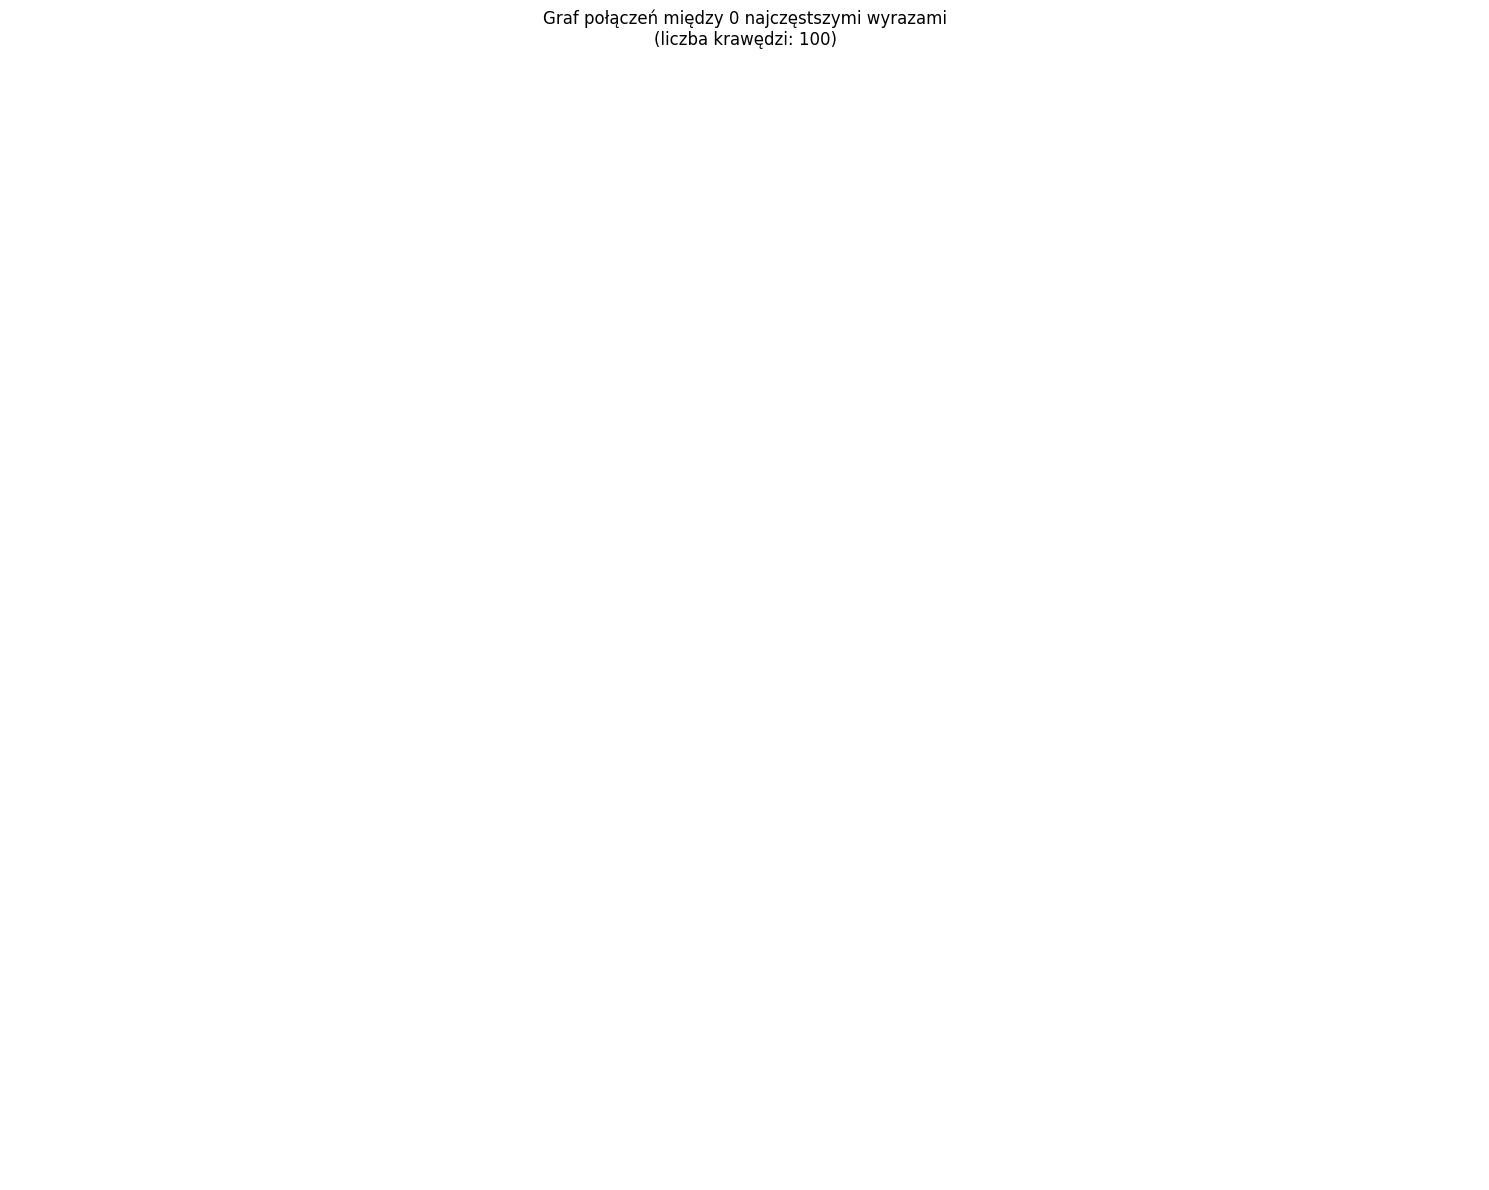


Najczęstsze pary sąsiadujących wyrazów:


In [13]:
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# TODO don't count weights but count neighbours
# list of most neighbours

# Pobierz 100 najczęstszych par wyrazów
num_of_pairs = 100

# Zbuduj macierz współwystępowania
cooccurrence = defaultdict(int)

words = [word for word in head.split()]

for word1, word2 in zip(words, words[1:]):
    # Połącz sąsiadujące wyrazy
    # Sortuj alfabetycznie, żeby uniknąć duplikatów (a, b) i (b, a)
    if word1 != word2:
        pair = tuple(sorted([word1, word2]))
        cooccurrence[pair] += 1

cooccurrence_reduced = dict(sorted(cooccurrence.items(), key=lambda x: x[1], reverse=True)[:num_of_pairs])
selected_words = {k[0] for k in cooccurrence_reduced.keys()}.union({k[1] for k in cooccurrence_reduced.keys()})

# Stwórz graf
G = nx.Graph()

# Dodaj węzły
for word in selected_words:
    G.add_node(word)

for (word1, word2), count in cooccurrence_reduced.items():
    G.add_edge(word1, word2, weight=count)

print(f"Graf ma {G.number_of_nodes()} węzłów i {G.number_of_edges()} krawędzi")

# Wizualizacja
plt.figure(figsize=(15, 12))

# Layout - sprawdź różne opcje
pos = nx.spring_layout(G, k=3, iterations=50)

# Rysuj krawędzie z różną grubością
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1

nx.draw_networkx_edges(G, pos, 
                      width=[w/max_weight * 3 for w in weights],
                      alpha=0.6, edge_color='gray')

# Rysuj węzły
nx.draw_networkx_nodes(G, pos, 
                      node_color='lightblue',
                      node_size=1000,
                      alpha=0.9)

# Rysuj etykiety
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title(f'Graf połączeń między {len(selected_words)} najczęstszymi wyrazami\n(liczba krawędzi: {num_of_pairs})')
plt.axis('off')
plt.tight_layout()
plt.show()

# Pokaż najczęstsze pary
print("\nNajczęstsze pary sąsiadujących wyrazów:")
for pair, count in sorted(cooccurrence_reduced.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{pair[0]} -- {pair[1]}: {count}")

GENERATOR ZDAŃ - graficzny

S,V,0 - Subject, Verb, Object

S, O
- zaimek osobowy
- fraza rzeczownikowa

forma rzeczownikowa
- rzeczownik
- rzeczownik z przymiotnikiem

elementy dodatkowe
- rodzajnik nieokreślony
- rodzajnik określony
- zaimek dzierżawczy
- zaimek wskazujący -> bliski, daleki
- liczby pojedyncza i mnoga
- odmiana przez przypadki
- związki zgody itp
- przymiotnik i rzeczownik w tym samym przypadku

czasownik
- forma twierdząca, przecząca, pytająca
- tryb orzekający, przypuszczający
- czasy
- czasowniki modalne 
- okoliczniki?

100 przymiotników
100 rzeczowników
100 czasowników

to jest tak naprawdę zdefiniowanie gramatyki formalnej dla tej części

generator form fleksyjnych

zliczyć występowanie za sobą tych wyrazów
uwaga mogą być różne formy rzeczowników

trzy kategorie: zakazane połączenia, rzadkie połączenia, częste połączenia

czy czerwona krowa się kiedykolwiek łączy?
połączyć tak przymiotnik z rzeczownikiem
oraz czasownik z rzeczownikiem

wyświetlić ile znaleziono takich połączeń